In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

In [3]:
# Toy dataset (dim 1 is the number of data items, and dim 2 is the length of each data item contents)
x_train = np.arange(15)[:,np.newaxis].astype(np.float32)
y_train = np.arange(15)[:,np.newaxis].astype(np.float32)

In [4]:
# Linear regression model
model = nn.Linear(in_features=input_size, out_features=output_size)

for param in model.parameters():
    #print(param)
    pass
print(model.weight.shape) # shape [10,10]
print(model.bias.shape) # shape [10]

torch.Size([1, 1])
torch.Size([1])


In [5]:
# Loss func and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # you put the parames(i.e. weights & bias for each layer of the model) into optimier

In [6]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs =   torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward pass
    outputs = model(inputs)
    #print(outputs)
    
    # Backward and optimize    
    loss = criterion(outputs, targets)
    #print(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

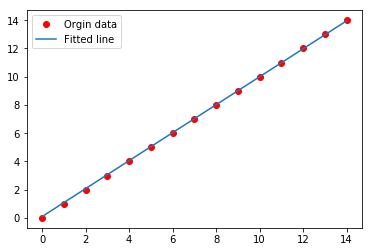

In [7]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Orgin data')
plt.plot(x_train, predicted, label="Fitted line")
plt.legend()
plt.show()